In [2]:
# Move up a directory (until the root of the git repo),
# but only if this has not been done before.
if 'in_correct_dir' not in locals():
    %cd -q ..
in_correct_dir = True
%pwd

'/home/wout/pp/code'

In [5]:
import io
import json
from pathlib import Path

import ipywidgets as W
from PIL import Image
from IPython.display import display

import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("artifacts/results/mnist_default_k10_e5.csv")
df = pd.read_csv("artifacts/results/mnist_default_k5_e10.csv")
# df = pd.read_csv("results.csv")
df.syst_prediction = df.syst_prediction.map(lambda s: np.array(json.loads(s)))
df.asss_prediction = df.asss_prediction.map(lambda s: np.array(json.loads(s)))
display(df.dtypes)
display(df.head(10))
display(df.describe())

inst_index           int64
inst_label           int64
syst_features        int64
syst_prediction     object
syst_pred_loss     float64
syst_pred_score      int64
asss_prediction     object
asss_pred_loss       int64
dtype: object

,inst_index,inst_label,syst_features,syst_prediction,syst_pred_loss,syst_pred_score,asss_prediction,asss_pred_loss
0,68000,8,0,"[[6.863408685831018e-08, 3.62839964509476e-05,...",0.008688,1,[0.9988325238227844],0
1,54000,8,1,"[[1.1948809941486616e-08, 4.37887841542306e-08...",0.000525,1,[0.999650239944458],0
2,40000,3,2,"[[8.283407737508242e-08, 1.221897150571749e-06...",0.009347,1,[0.999240517616272],0
3,26000,9,3,"[[3.2452856402187535e-08, 2.2401549358619377e-...",0.002190,1,[0.9984506368637085],0
4,12000,5,4,"[[8.950835732324247e-12, 3.3058188131374067e-1...",0.000004,1,[0.9999843835830688],0
5,68001,3,0,"[[3.523479077949254e-11, 8.255656069877659e-08...",0.000006,1,[0.9999486207962036],0
6,54001,4,1,"[[2.015071004279889e-06, 0.0001075827458407729...",0.001100,1,[0.9874424338340759],0
7,40001,9,2,"[[1.1579123215810228e-09, 1.1292742296831193e-...",0.000655,1,[0.9998462200164795],0
8,26001,6,3,"[[4.419377717113093e-07, 3.3138319395220606e-0...",0.000124,1,[0.9998167157173157],0
9,12001,2,4,"[[4.889796553775305e-11, 1.113038372579922e-08...",0.000002,1,[0.999985933303833],0


,inst_index,inst_label,syst_features,syst_pred_loss,syst_pred_score,asss_pred_loss
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,40999.500000,4.484000,2.000000,0.083453,0.97360,0.103500
std,19808.396465,2.905131,1.414284,0.508536,0.16033,0.763313
min,12000.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,26499.750000,2.000000,1.000000,0.000025,1.00000,0.000000
50%,40999.500000,4.000000,2.000000,0.000281,1.00000,0.000000
75%,55499.250000,7.000000,3.000000,0.003122,1.00000,0.000000
max,69999.000000,9.000000,4.000000,11.338470,1.00000,15.000000


Num base mispredictions 264


asss_prediction,False,True
syst_pred_score,,
0,17,247
1,31,9705


'Brier Score: 0.0278'

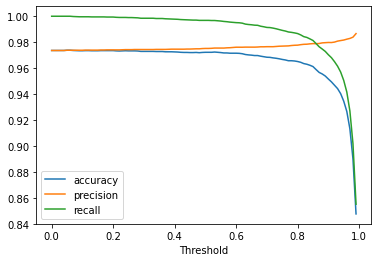

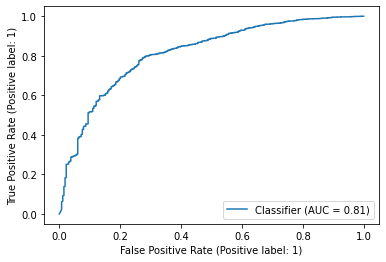

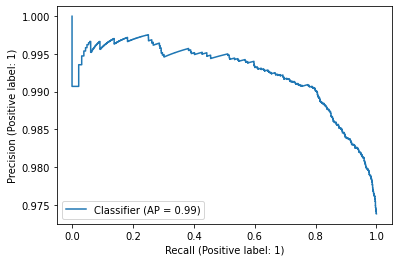

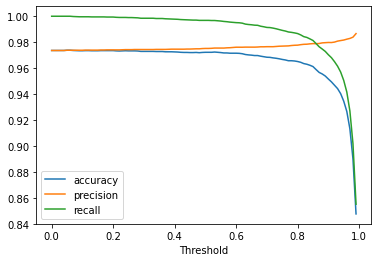

In [9]:
from sklearn.metrics import roc_curve, brier_score_loss, RocCurveDisplay, PrecisionRecallDisplay, accuracy_score, precision_score, recall_score, balanced_accuracy_score
print(f"Num base mispredictions {(df.syst_pred_score == 0).sum() }")
def metrics_for_threshold(df, threshold = 0.5):
    preds = df.asss_prediction.map(lambda p: p[0] > threshold)
    display(pd.crosstab(df.syst_pred_score, preds))
    display(f"Brier Score: {brier_score_loss(df.syst_pred_score, preds)}")

metrics_for_threshold(df, 0.5)
# metrics_for_treshold(df, 0.0)
# Make AUC
# Give it identity feature
RocCurveDisplay.from_predictions(y_true=df.syst_pred_score, y_pred=df.asss_prediction.map(lambda p: p[0]))
PrecisionRecallDisplay.from_predictions(y_true=df.syst_pred_score, y_pred=df.asss_prediction.map(lambda p: p[0]))

def plot_thresholding(df):
    def metrics_for_threshold2(df, threshold):
        y_true = df.syst_pred_score
        y_pred = df.asss_prediction.map(lambda p: p[0] > threshold)
        return (accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred), balanced_accuracy_score(y_true, y_pred))
    thresholds = np.arange(0, 1, 0.01)
    accuracies, precisions, recalls, bal_accs = zip(*[metrics_for_threshold2(df, t) for t in thresholds])
    fig = plt.figure()
    ax = plt.gca()
    # ax = fig.axes[0]
    ax.plot(thresholds, accuracies, label="accuracy")
    ax.plot(thresholds, precisions, label="precision")
    ax.plot(thresholds, recalls, label="recall")
    # ax.plot(thresholds, bal_accs, label="balanced accuracy")
    ax.set_xlabel("Threshold")
    ax.legend()
    return fig
    
    
display(plot_thresholding(df))